# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':1.4,
    'stickiness_wi':5000,
    'stickiness_bt':5, # 100
    'sparsity':0.08,
    'pvar': 2,
    'lrate':0.8,
    'lratep':1,
    'decay_rate':1,
} 
args = {
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str

'concentration_1.400-stickiness_wi_5000.000-stickiness_bt_5.000-sparsity_0.080-pvar_2.000-lrate_0.800-lratep_1.000-decay_rate_1.000'

### main

In [5]:
ns = 12
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([1.        , 0.79583333, 0.97135417, 0.66197917, 0.62447917])

<BarContainer object of 5 artists>

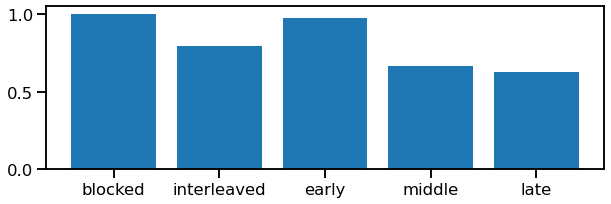

In [7]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)

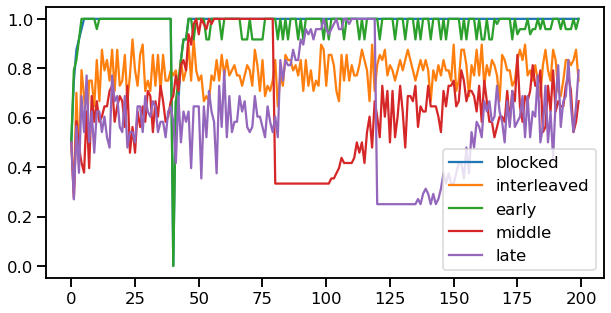

In [8]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()

# model state

In [9]:
curr_idx = 0
seed_idx = 0

In [10]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [11]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([5004., 5008., 5012., 5016., 5020., 5024., 5028., 5032., 5036.,
       5040., 5044., 5048., 5052., 5056., 5060., 5064., 5068., 5072.,
       5076., 5080., 5084., 5088., 5092., 5096., 5100., 5104., 5108.,
       5112., 5116., 5120., 5124., 5128., 5132., 5136., 5140., 5144.,
       5148., 5152., 5156., 5160.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,  161.,
        161.,  161.,  161.,  161.,  161.,  161.,  161.,  161., 5164.,
       5168., 5172., 5176., 5180., 5184., 5188., 5192., 5196., 5200.,
       5204., 5208., 5212., 5216., 5220., 5224., 5228., 5232., 5236.,
       5240., 5244., 5248., 5252., 5256., 5260., 5264., 5268., 5272.,
       5276., 5280., 5284., 5288., 5292., 5296., 5300., 5304., 5308.,
       5312., 5316., 5320.,  321.,  321.,  321.,  321.,  321.,  321.,
        321.,  321.,